In [1]:
# test the fitting:
# Chi2 on lag-hr, hard bound = False

In [2]:
import pickle
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from optimization_utils import param_vec_to_dict, make_boundary

In [3]:
folder = "0826_Chi2_50_100/"

In [4]:
file_list = glob.glob(folder + "outfiles/*data*.pkl")
file_list = [i.replace(folder + "outfiles/","") for i in file_list]
file_list = [i.replace(".pkl","") for i in file_list]
file_list = [tuple(map(int,i.split("data"))) for i in file_list]
file_list.sort()
# file_list

In [5]:
pso_df = pd.DataFrame(columns = ['iter','particle','err'])
_, _, what_to_fit = make_boundary()

for iter, p in file_list:
    path = folder + "outfiles/" + str(iter) + "data" + str(p) + ".pkl" 
    with open(path, 'rb') as inp:
        data = pickle.load(inp)
    if len(data) != 0:
        err = data['err']
        params = data['params']
        row_dict = {"iter":iter,"particle":p,"err":err}
        row_dict.update({what_to_fit[i]:params[i] for i in range(len(params))})
        pso_df = pso_df.append(row_dict,ignore_index=True)
    
pso_df

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
0,1.0,0.0,1660.160947,0.895252,0.226085,0.447212,0.704666,0.353162,0.441571
1,1.0,1.0,2808.725567,0.358628,0.885856,0.805342,0.599837,0.222191,0.603333
2,1.0,2.0,2808.725567,0.258506,0.323974,0.695840,0.781264,0.550048,0.432775
3,1.0,3.0,1679.483120,0.446066,0.496087,0.672876,0.210179,0.629085,0.566090
4,1.0,4.0,2766.156659,0.761041,0.840064,0.388427,0.885007,0.304708,0.170176
...,...,...,...,...,...,...,...,...,...
1283,50.0,75.0,2788.614931,0.446663,0.111066,0.208869,0.967141,0.907657,0.725689
1284,50.0,79.0,1671.601390,0.384765,0.065834,0.038642,0.576953,0.699680,0.688145
1285,50.0,85.0,2808.725567,0.790758,0.563426,0.117034,0.990960,0.961120,0.952372
1286,50.0,94.0,1665.873682,0.775836,0.349661,0.051365,0.861828,0.818401,0.681545


In [6]:
pso_df.loc[pso_df.iter == 50]

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
1267,50.0,0.0,847.124626,0.649434,0.467379,0.119504,0.976497,0.951370,0.859815
1268,50.0,4.0,1679.483120,0.514850,0.466652,0.341733,0.228415,0.632918,0.803200
1269,50.0,7.0,2808.725567,0.793042,0.250486,0.358926,0.942952,0.452797,0.637797
1270,50.0,9.0,524.485245,0.446779,0.234397,0.042086,0.962506,0.819339,0.815259
1271,50.0,15.0,2766.193850,0.895164,0.372372,0.368507,0.926014,0.545836,0.749131
1272,50.0,21.0,2779.341204,0.495087,0.014308,0.164043,0.967547,0.910864,0.237968
1273,50.0,22.0,1679.483120,0.516540,0.512734,0.439668,0.125401,0.442026,0.839438
1274,50.0,28.0,2808.725567,0.175118,0.638878,0.374656,0.861294,0.554207,0.817543
1275,50.0,31.0,2808.725567,0.301795,0.957485,0.396563,0.980542,0.233525,0.727932
1276,50.0,32.0,1679.483120,0.814083,0.382055,0.675564,0.172672,0.667790,0.646586


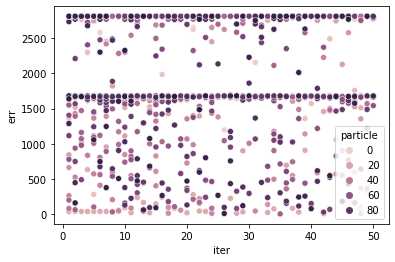

In [7]:
sns.scatterplot(data=pso_df, x="iter", y="err", hue="particle")
plt.show()

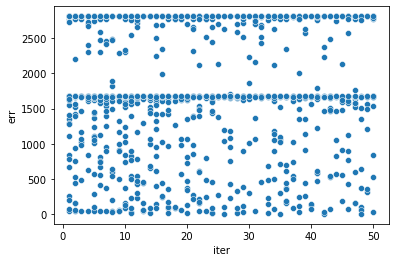

In [8]:
sns.scatterplot(data=pso_df, x="iter", y="err")
plt.show()

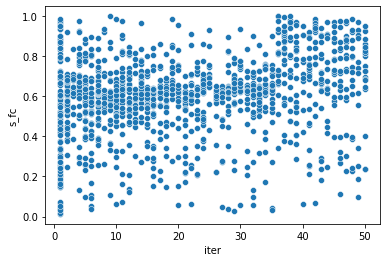

In [9]:
sns.scatterplot(data=pso_df, x="iter", y="s_fc")
plt.show()

In [10]:
param_vec = np.loadtxt('/home1/beigejin/MyCMR2/Modeling/CMR2/fitting/' + folder + 'outfiles/xoptb.txt')
prams = param_vec_to_dict(param_vec)
prams

{'beta_enc': 0.533607,
 'beta_rec': 0.34992,
 'beta_rec_post': 0.030475,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.89891,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.973297,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'gamma_fc': 0.815941,
 'gamma_cf': 0.5}

### Run CMR2 on the Best Params

In [11]:
import CMR2_jbg as cmr
pd.set_option('display.max_columns', None)
np.set_printoptions(edgeitems=20, linewidth=200,precision=4)

In [12]:
rng = np.random.default_rng(seed=42)

In [13]:
# import recognition dataframe
with open("/home1/beigejin/Recog_David/data_als/data_df_clean.pkl", 'rb') as inp:
    df = pickle.load(inp)
df

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length,itemno,session
57307,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0,NaN,0,53,0
57766,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0,NaN,0,26,0
58224,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0,NaN,0,33,0
58695,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0,NaN,1,151,0
59159,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0,NaN,0,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337333,1911.000,656,COLA,37,Beverages,2.0,Beverages,575,True,0,18.0,18,60,547
337508,2358.000,656,BASEBALL,115,Toys,8.0,Toys,576,True,1,23.0,23,10,547
337682,1239.000,656,TEA,24,Beverages,8.0,Beverages,577,True,1,19.0,19,265,547
337870,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,578,True,0,NaN,23,213,547


In [14]:
s_mat = np.load('/home1/beigejin/Recog_David/data_als/semantic_mat_fasttext.npy')

In [15]:
df_simu = cmr.run_continuous_recog_multi_sess(prams,df,s_mat)
df_simu

CMR Time: 229.63199400901794


,session,position,itemno,s_resp,s_rt,csim
57307,0,0,53,0.0,0.0,0.000000
57766,0,1,26,0.0,0.0,0.508695
58224,0,2,33,0.0,0.0,0.790601
58695,0,3,151,0.0,0.0,0.925132
59159,0,4,187,0.0,0.0,0.960940
...,...,...,...,...,...,...
337333,547,575,60,1.0,0.0,0.986368
337508,547,576,10,1.0,0.0,0.980174
337682,547,577,265,1.0,0.0,0.982022
337870,547,578,213,1.0,0.0,0.981690


In [16]:
df_new = df_simu.merge(df,on=['session','position','itemno'])
df_new

,session,position,itemno,s_resp,s_rt,csim,rt,subject_ID,item,lag,category,confidence,category_label,old,yes,curr_cat_length,curr_cat_label_length
0,0,0,53,0.0,0.0,0.000000,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,False,0,NaN,0
1,0,1,26,0.0,0.0,0.508695,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,False,0,NaN,0
2,0,2,33,0.0,0.0,0.790601,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,False,0,NaN,0
3,0,3,151,0.0,0.0,0.925132,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,False,0,NaN,1
4,0,4,187,0.0,0.0,0.960940,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,False,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317835,547,575,60,1.0,0.0,0.986368,1911.000,656,COLA,37,Beverages,2.0,Beverages,True,0,18.0,18
317836,547,576,10,1.0,0.0,0.980174,2358.000,656,BASEBALL,115,Toys,8.0,Toys,True,1,23.0,23
317837,547,577,265,1.0,0.0,0.982022,1239.000,656,TEA,24,Beverages,8.0,Beverages,True,1,19.0,19
317838,547,578,213,1.0,0.0,0.981690,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,True,0,NaN,23


In [17]:
f = folder.rstrip("/")

In [18]:
with open('/home1/beigejin/Recog_David/data_als/data_df_simu_' + f + '.pkl', 'wb') as outp:
    pickle.dump(df_new, outp, pickle.HIGHEST_PROTOCOL)